In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_orig=pd.read_excel("Base_Problem_DataSet.xlsb")
df_orig

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,...,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Service,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Retired,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Commercial,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Service,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Commercial,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Govt Job,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Service,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0


In [3]:
df=df_orig.copy()

In [4]:
df

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,...,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Service,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Retired,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Commercial,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Service,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Commercial,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Govt Job,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Service,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0


**This is highly imbalanced dataset as nearly 92% of data belongs to class 0 and only 8% belongs to class 1**

In [5]:
idx=df.Default.value_counts().index.values
values=df.Default.value_counts()
tot_percent=df.Default.value_counts()/len(df) *100

pd.DataFrame({'Values':values,'Percent':tot_percent})


,Values,Percent
Default,,
0,112011,91.920792
1,9845,8.079208


In [6]:
print(df.columns.values)

['ID' 'Patron_Salary' 'Automobile_Possession' 'Two-Wheeler_Ownership'
 'Ongoing_Borrowing' 'Residence_Proprietorship' 'Offspring_Number'
 'Loan_Capital' 'Borrowing_Periodic_Payment' 'Customer_Revenue_Category'
 'Patron_Academic_Qualification' 'Customer_Conjugal_State' 'Patron_Sex'
 'Borrowing_Agreement_Category' 'Customer_Living_Arrangement'
 'Population_Fraction_by_Region' 'Elderliness_in_Days'
 'Work_Duration_in_Days' 'Enlistment_Period_in_Days'
 'Identity_Age_in_Days' 'Private_Dwelling_Duration' 'Cellphone_Marker'
 'Residential_Phone_Marker' 'Employment_Phone_Operation'
 'Customer_Vocation' 'Patron_Kin_Count' 'Customer_Urban_Area_Ranking'
 'Request_Submission_Day' 'Request_Submission_Hour'
 'Patron_Constant_Correspondence_Marker'
 'Customer_Professional_Communication_Marker' 'Sort_of_Institution'
 'Rating_Origin_1' 'Rating_Origin_2' 'Rating_Origin_3'
 'Community_Non-Payment_Incidence' 'Telecommunication_Switch'
 'Solvency_Information_Agency' 'Default']


Replacing invalid values from numerical columns with nan, so we can fill them later

In [7]:
num_cols=['Patron_Salary', 'Offspring_Number', 'Loan_Capital', 'Borrowing_Periodic_Payment', 'Population_Fraction_by_Region', 'Elderliness_in_Days',
 'Work_Duration_in_Days', 'Enlistment_Period_in_Days', 'Identity_Age_in_Days', 'Private_Dwelling_Duration', 'Patron_Kin_Count', 'Rating_Origin_1',
 'Rating_Origin_2', 'Rating_Origin_3', 'Community_Non-Payment_Incidence']

df[num_cols]=df[num_cols].replace(['$','#','@','x','&','0xf'],np.NaN)

In [8]:
df['Patron_Salary'].fillna(df['Patron_Salary'].mean(),inplace=True)

**Below plot shows majority people applying for loan have income in range of Rs 4000 - Rs 30000**

<Axes: xlabel='Patron_Salary', ylabel='Count'>

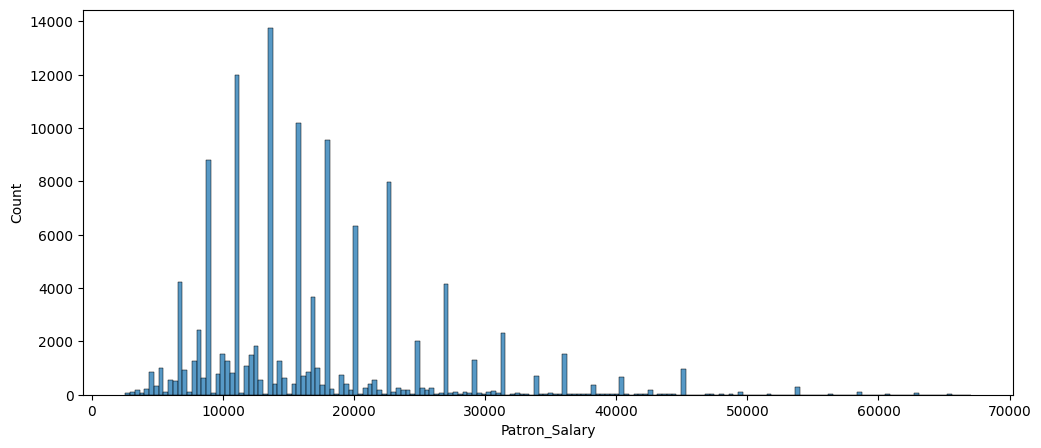

In [9]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['Patron_Salary']<67500],x='Patron_Salary')

<Axes: xlabel='Patron_Salary'>

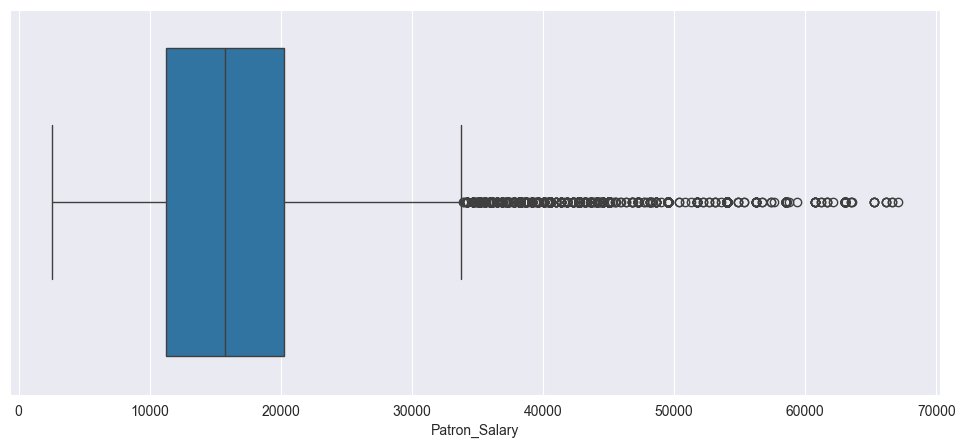

In [10]:
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
#sns.boxplot(df,x='Patron_Salary')
sns.boxplot(df[df['Patron_Salary']<67500],x='Patron_Salary')


Removing outliers

In [11]:
def detect_outlier1(arr,range_=1.5):
    q25,q75 = np.percentile(a = arr,q=[25,75])
    IQR = q75 - q25
    lower_limit=q25-range_*IQR
    upper_limit=q75+range_*IQR
    print("Lower limit:",lower_limit,":::Upper Limit:",upper_limit)
    return lower_limit,upper_limit

In [12]:
lower_limit,upper_limit=detect_outlier1(df.Patron_Salary)

Lower limit: -2250.0 :::Upper Limit: 33750.0


If we delete values above upper limit i.e 33750 then we loose 360 rows of class 1 but if we set upper limit to 67500, we loose only 10 rows of class 1 data 

In [13]:
print('> 33750.0:',f"total rows : {df[df['Patron_Salary']>33700].Default.count()} , class 1 rows :{df[df['Patron_Salary']>33700].Default.sum()}")
print('> 67500.0:',f"total rows : {df[df['Patron_Salary']>67500].Default.count()} , class 1 rows :{df[df['Patron_Salary']>67500].Default.sum()}")


> 33750.0: total rows : 6086 , class 1 rows :360
> 67500.0: total rows : 306 , class 1 rows :10


In [14]:
df.drop(df[ df['Patron_Salary']>67500].index,axis=0,inplace=True)

**Below plot shows majority people are applying for loan of upto Rs 140000**

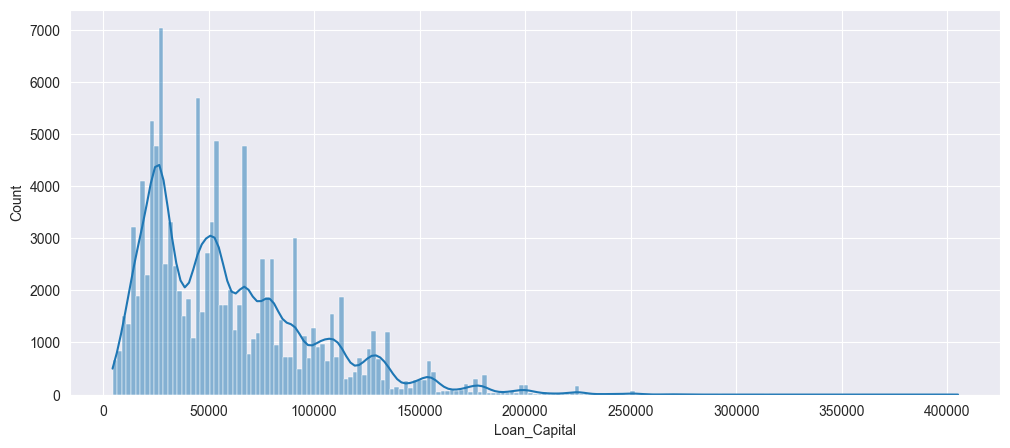

<Axes: xlabel='Loan_Capital'>

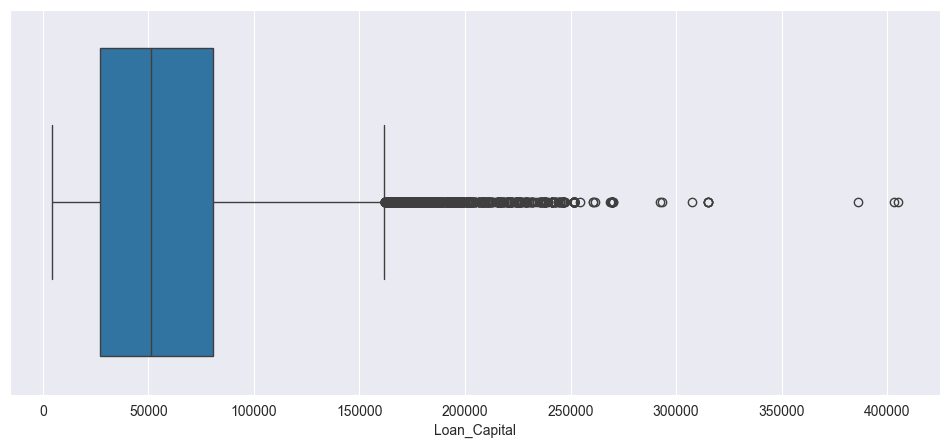

In [15]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,x='Loan_Capital',kde=True)
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='Loan_Capital')

In [16]:
df['Loan_Capital'].fillna(df['Loan_Capital'].mean(),inplace=True)

lower_limit,upper_limit=detect_outlier1(df.Loan_Capital)

Lower limit: -52888.50000000001 :::Upper Limit: 161117.1


In [17]:
print(f'> {upper_limit}:',f"total rows : {df[df['Loan_Capital']>upper_limit].Default.count()} , class 1 rows :{df[df['Loan_Capital']>upper_limit].Default.sum()}")

upper_limit=205000
print(f'> {upper_limit}:',f"total rows : {df[df['Loan_Capital']>upper_limit].Default.count()} , class 1 rows :{df[df['Loan_Capital']>upper_limit].Default.sum()}")

> 161117.1: total rows : 2503 , class 1 rows :94
> 205000: total rows : 528 , class 1 rows :12


In [18]:
df.drop(df[ df['Loan_Capital']>upper_limit].index,axis=0,inplace=True)

**We can also see that loan default is not affected by the amount of loan or applicant's income. It varies through out the data.**

<Axes: xlabel='Patron_Salary', ylabel='Loan_Capital'>

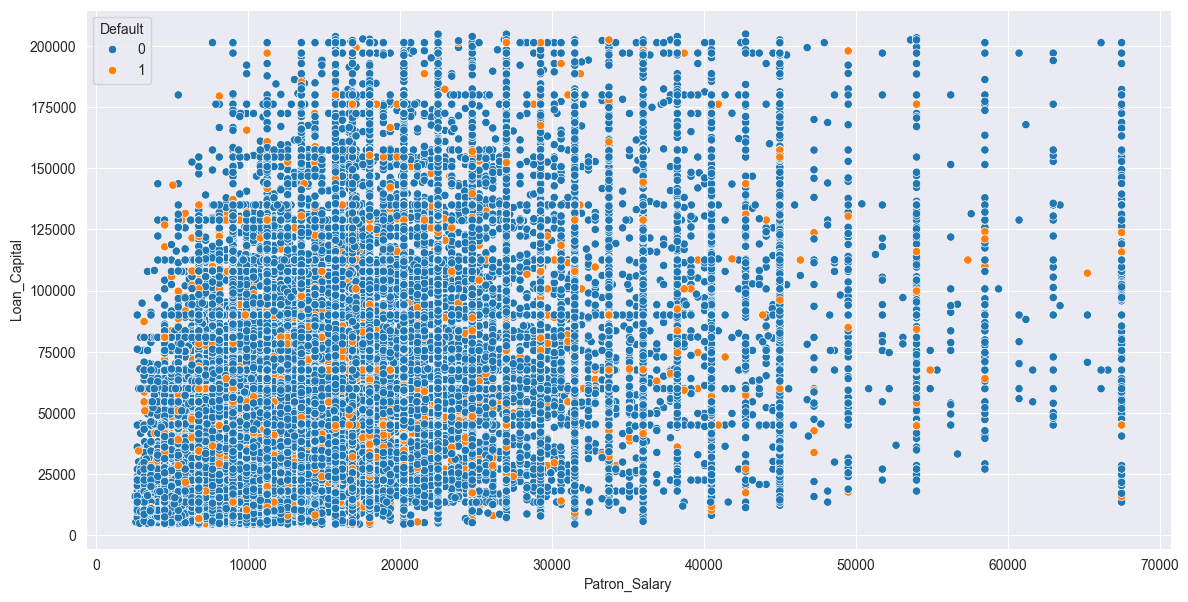

In [19]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=df,x='Patron_Salary',y='Loan_Capital',hue='Default')

**Following plot indicates that there were more male candidated for loan application than Females.**

**Proportion of males(7%) and females(10%) who failed to repay loan is almost similar**

In [20]:
df.drop(df[df.Patron_Sex=='XNA'].index,axis=0,inplace=True)

<Axes: xlabel='Patron_Sex', ylabel='count'>

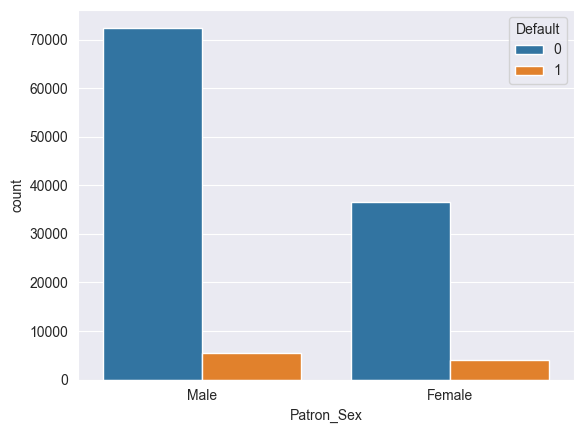

In [21]:
sns.countplot(data=df,x='Patron_Sex',hue='Default')

In [22]:
print( f" Out of all Males {df[(df.Patron_Sex=='Male')& (df.Default==1)].shape[0] / df[(df.Patron_Sex=='Male')].shape[0] *100} % males failed to replay loan")
print( f" Out of all Females {df[(df.Patron_Sex=='Female')& (df.Default==1)].shape[0] / df[(df.Patron_Sex=='Female')].shape[0] *100} % females failed to replay loan")

 Out of all Males 7.085837294824648 % males failed to replay loan
 Out of all Females 10.09560889064117 % females failed to replay loan


In [23]:
cat_cols_na_index=[]
cat_cols_na_index.extend(df[df.Patron_Sex.isna()].index.values.tolist())


#df.Patron_Sex.fillna('unknown',inplace=True)
df.Patron_Sex.fillna(df.Patron_Sex.mode()[0],inplace=True)

**Most of loan applications are from married people**

<Axes: xlabel='Customer_Conjugal_State', ylabel='count'>

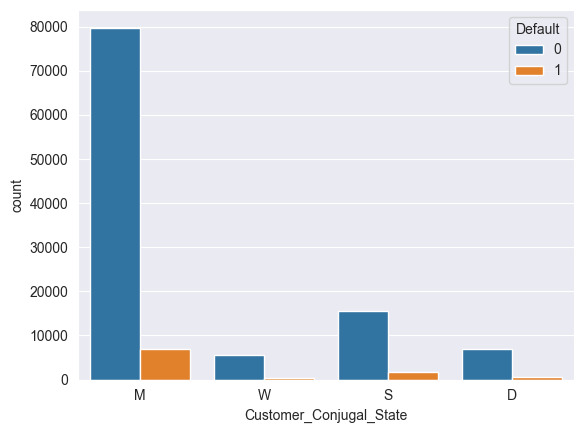

In [25]:
sns.countplot(data=df,x='Customer_Conjugal_State',hue='Default')


In [26]:
df.Customer_Conjugal_State.isna().sum()

3449

In [27]:

#f.Customer_Conjugal_State.fillna('unknown',inplace=True)
df.Customer_Conjugal_State.fillna(df.Customer_Conjugal_State.mode()[0],inplace=True)

**Below charts shows most max people have 2 dependants and 0 children**

**Few have 1 to 4 dependants and 1 to 3 childrens**

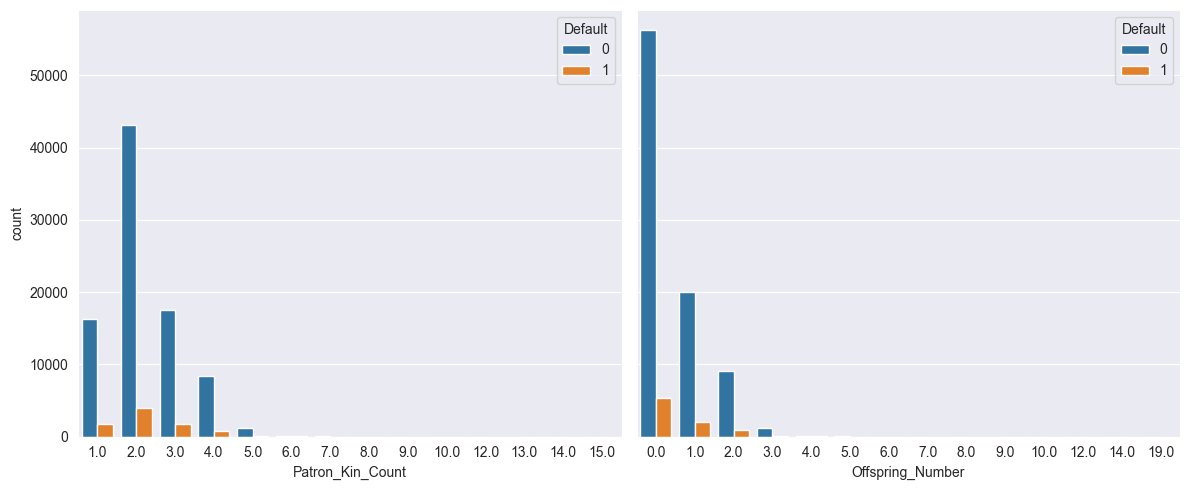

In [287]:
fig,ax=plt.subplots(1,2,figsize=(12,5),sharey=True)
sns.countplot(data=df,x='Patron_Kin_Count',hue='Default',ax=ax[0])
sns.countplot(data=df,x='Offspring_Number',hue='Default',ax=ax[1])
plt.tight_layout()

In [29]:
df.Patron_Kin_Count.isna().sum()

2385

In [30]:
df.Patron_Kin_Count.fillna(df.Patron_Kin_Count.mode()[0],inplace=True)

In [32]:
df.Offspring_Number.isna().sum()

3617

In [33]:
df.Offspring_Number.fillna(df.Offspring_Number.mode()[0],inplace=True)

**Below plot shows population fraction by customers region**

In [34]:
df.drop( df[df.Population_Fraction_by_Region>10].index,axis=0,inplace=True)

<Axes: xlabel='Population_Fraction_by_Region'>

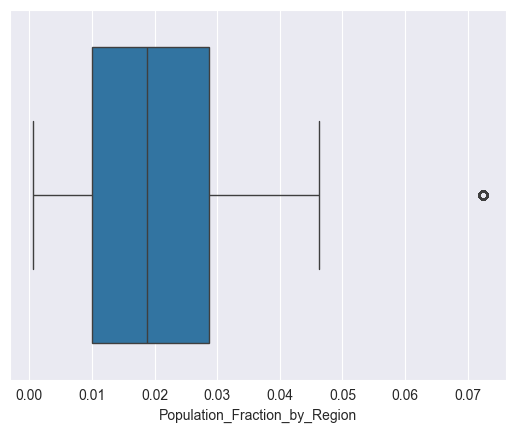

In [35]:
sns.boxplot(data=df,x='Population_Fraction_by_Region')

<Axes: xlabel='Population_Fraction_by_Region', ylabel='Count'>

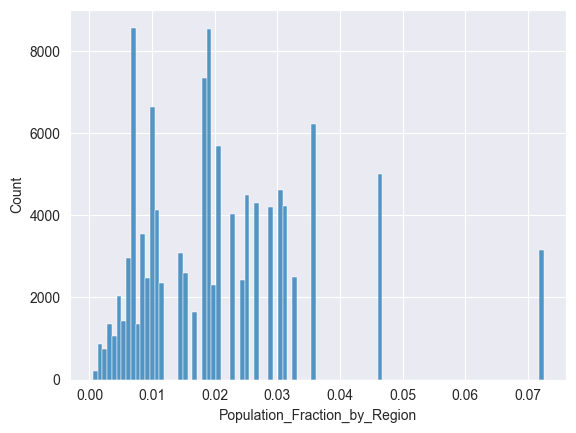

In [36]:
sns.histplot(data=df,x='Population_Fraction_by_Region')

In [37]:
df.Population_Fraction_by_Region.isna().sum()

4838

In [38]:
df.Population_Fraction_by_Region.fillna(df.Population_Fraction_by_Region.mode()[0],inplace=True)

In [39]:
df[df.Population_Fraction_by_Region>0.05].loc[:,'Population_Fraction_by_Region']=df.Population_Fraction_by_Region.mode()[0]

**Most of people don't have automobiles(cars) or two-wheeler. Many have their own residence and have Secondary qualification.**

In [40]:
replace_cat_cols=['Automobile_Possession','Two-Wheeler_Ownership','Ongoing_Borrowing','Residence_Proprietorship','Cellphone_Marker','Residential_Phone_Marker','Employment_Phone_Operation'
                  ,'Patron_Constant_Correspondence_Marker','Customer_Professional_Communication_Marker']

df[replace_cat_cols]=df[replace_cat_cols].replace({0:'No',0.0:'No',1:'Yes',1.0:'Yes'})

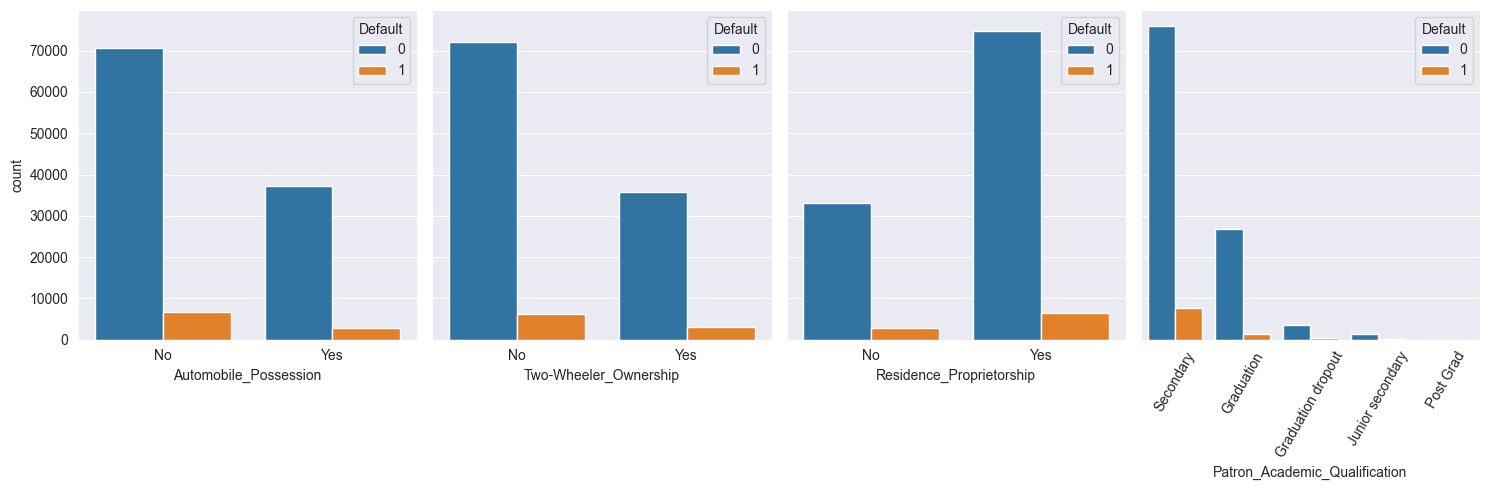

In [41]:
fig,ax=plt.subplots(1,4,figsize=(15,5),sharey=True)
sns.countplot(data=df,x='Automobile_Possession',hue='Default',ax=ax[0])
sns.countplot(data=df,x='Two-Wheeler_Ownership',hue='Default',ax=ax[1])
sns.countplot(data=df,x='Residence_Proprietorship',hue='Default',ax=ax[2])
sns.countplot(data=df,x='Patron_Academic_Qualification',hue='Default',ax=ax[3])
ax[3].tick_params(axis='x', rotation=60)
plt.tight_layout()

In [42]:
df.Automobile_Possession.isna().sum(),df['Two-Wheeler_Ownership'].isna().sum(),df.Residence_Proprietorship.isna().sum(),df.Patron_Academic_Qualification.isna().sum()

(3561, 3594, 3636, 3625)

In [43]:
cat_cols_na_index.extend(df[df.Automobile_Possession.isna()].index.values.tolist())
cat_cols_na_index.extend(df[df['Two-Wheeler_Ownership'].isna()].index.values.tolist())
cat_cols_na_index.extend(df[df.Residence_Proprietorship.isna()].index.values.tolist())
cat_cols_na_index.extend(df[df.Patron_Academic_Qualification.isna()].index.values.tolist())

In [44]:
# df.Automobile_Possession.fillna('unknown',inplace=True)
# df['Two-Wheeler_Ownership'].fillna('unknown',inplace=True)
# df.Residence_Proprietorship.fillna('unknown',inplace=True)
# df.Patron_Academic_Qualification.fillna('unknown',inplace=True)

In [45]:
df.Automobile_Possession.fillna(df.Automobile_Possession.mode()[0],inplace=True)
df['Two-Wheeler_Ownership'].fillna(df['Two-Wheeler_Ownership'].mode()[0],inplace=True)
df.Residence_Proprietorship.fillna(df.Residence_Proprietorship.mode()[0],inplace=True)
df.Patron_Academic_Qualification.fillna(df.Patron_Academic_Qualification.mode()[0],inplace=True)

**Most Loans are of CL Category**

<Axes: xlabel='Borrowing_Agreement_Category', ylabel='count'>

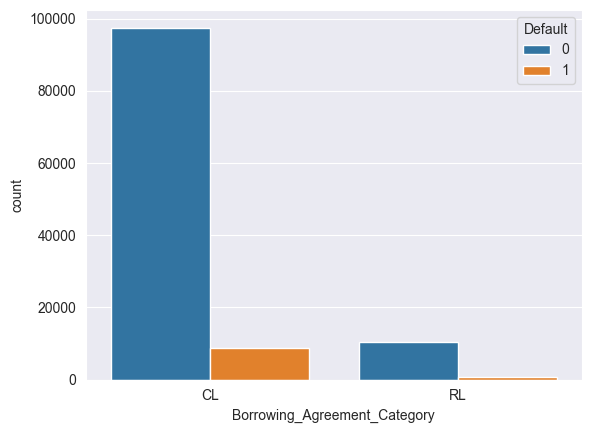

In [46]:
sns.countplot(x=df.Borrowing_Agreement_Category,hue=df.Default)

In [47]:
cat_cols_na_index.extend(df[df.Borrowing_Agreement_Category.isna()].index.values.tolist())

In [48]:
#df.Borrowing_Agreement_Category.fillna('unknown',inplace=True)

df.Borrowing_Agreement_Category.fillna(df.Borrowing_Agreement_Category.mode()[0],inplace=True)

**There are no outliers in Elderliness_in_Days column**

Text(0.5, 0, 'Elderliness in years')

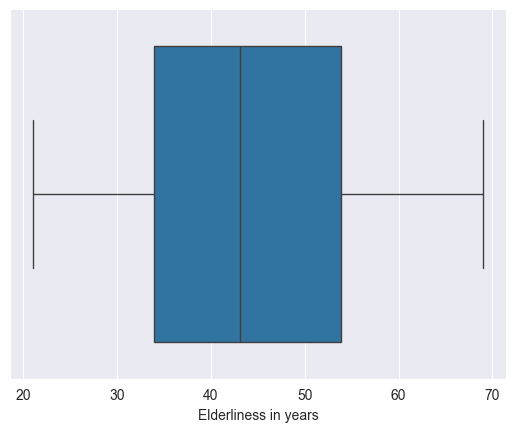

In [50]:
sns.boxplot(x=(df.Elderliness_in_Days/365).round(2))
plt.xlabel("Elderliness in years")

Text(0.5, 0, 'Elderliness in years')

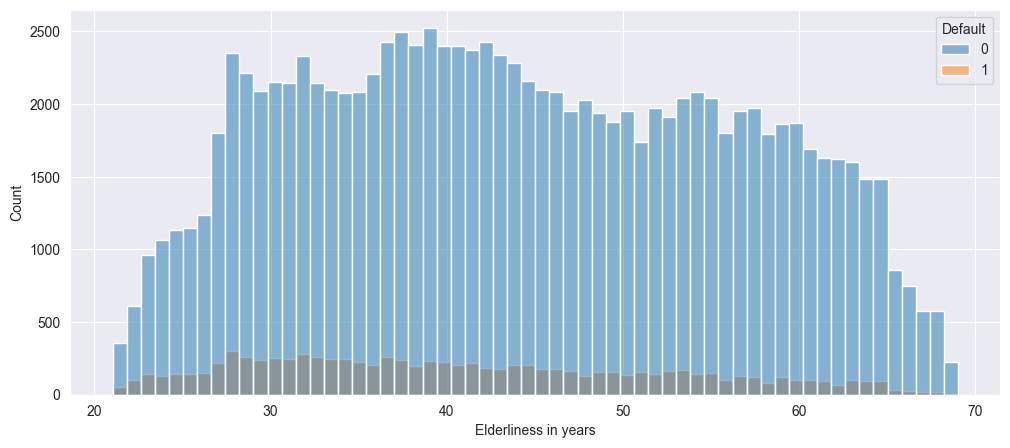

In [51]:
plt.figure(figsize=(12,5))
sns.histplot( x=(df.Elderliness_in_Days/365).round(2) ,hue=df.Default) ;
plt.xlabel("Elderliness in years")

In [52]:
df['Elderliness_in_Days'].fillna(df['Elderliness_in_Days'].mean(),inplace=True)

In [53]:
lower_limit,upper_limit=detect_outlier1(df.Elderliness_in_Days/365)

Lower limit: 5.347945205479448 :::Upper Limit: 82.47671232876712


In [54]:
df[ df['Elderliness_in_Days']/365 > upper_limit ]

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,...,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default


In [55]:
df['Elderliness_in_Years']=( df['Elderliness_in_Days']/365 ).round(3)

df.drop('Elderliness_in_Days',axis=1,inplace=True)

<Axes: xlabel='Elderliness_in_Years', ylabel='Count'>

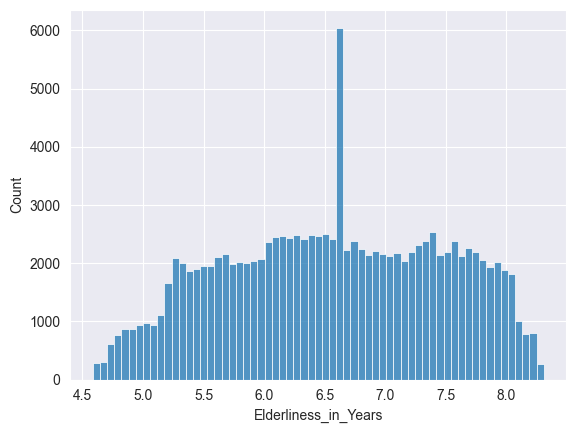

In [56]:
sns.histplot(x=np.power( df.Elderliness_in_Years ,1/2) )

In [57]:
df['Elderliness_in_Years']=np.power( df['Elderliness_in_Years'] ,1/2)

**In Work_Duration_in_Days column, there are 21021 rows where people have worked `1000` years.**

Text(0.5, 0, 'Work duration in Years')

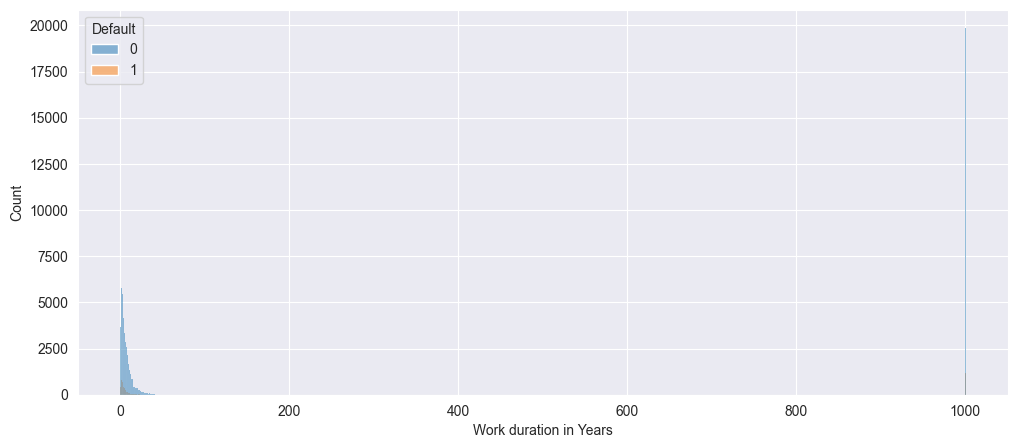

In [58]:
plt.figure(figsize=(12,5))
sns.histplot( x=(df.Work_Duration_in_Days/365).round(2) ,hue=df.Default) ;
plt.xlabel("Work duration in Years")

In [59]:
df[['ID','Work_Duration_in_Days']][ df.Work_Duration_in_Days/365 >50 ].assign(Work_Duration_in_Years=df.Work_Duration_in_Days/365)

,ID,Work_Duration_in_Days,Work_Duration_in_Years
3,12188929,365243.0,1000.665753
6,12128086,365243.0,1000.665753
7,12215264,365243.0,1000.665753
9,12130547,365243.0,1000.665753
13,12130196,365243.0,1000.665753
...,...,...,...
121825,12192622,365243.0,1000.665753
121831,12167066,365243.0,1000.665753
121841,12129641,365243.0,1000.665753
121846,12204389,365243.0,1000.665753


In [60]:
df.Work_Duration_in_Days[df.Work_Duration_in_Days/365 >50 ].value_counts()

Work_Duration_in_Days
365243.0    21021
Name: count, dtype: int64

In [61]:
df.drop(df[df.Work_Duration_in_Days/365 >50 ].index,axis=0,inplace=True)

Text(0.5, 0, 'Work duration in Years')

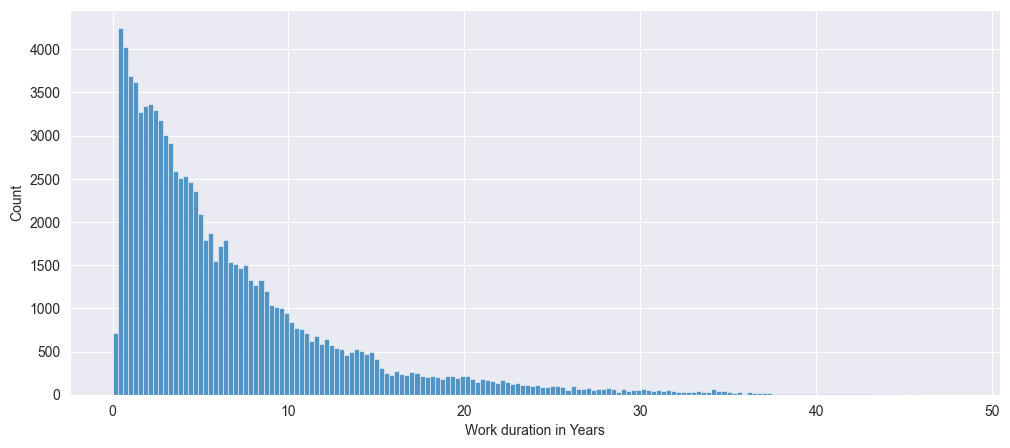

In [62]:
plt.figure(figsize=(12,5))
sns.histplot( x=(df.Work_Duration_in_Days/365).round(2) ) ;
plt.xlabel("Work duration in Years")

Text(0.5, 0, 'Work duration in Years')

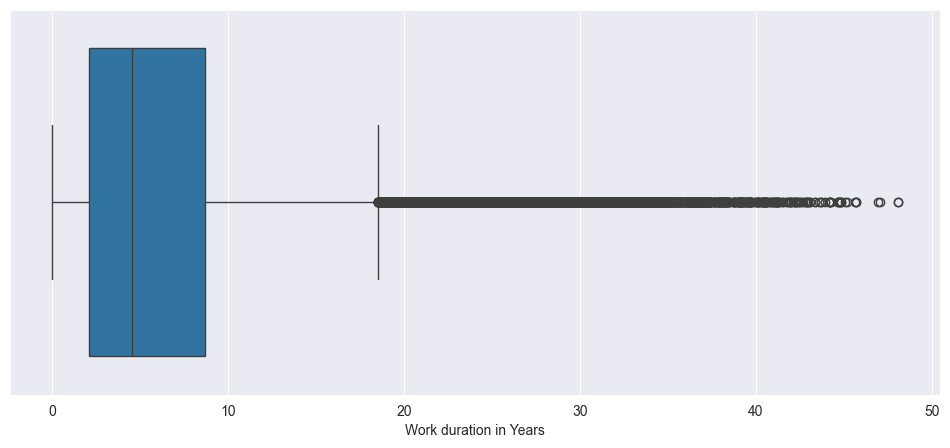

In [63]:
plt.figure(figsize=(12,5))
sns.boxplot( x=(df.Work_Duration_in_Days/365).round(2) ) ;
plt.xlabel("Work duration in Years")

In [64]:
lower_limit,upper_limit=detect_outlier1( df[~df.Work_Duration_in_Days.isna()].Work_Duration_in_Days/365 ,2)

Lower limit: -11.041095890410958 :::Upper Limit: 21.80821917808219


In [65]:
df[df.Work_Duration_in_Days/365>21.8].Default.sum()

154

In [66]:
df.drop(df[ df['Work_Duration_in_Days']/365>upper_limit].index,axis=0,inplace=True)

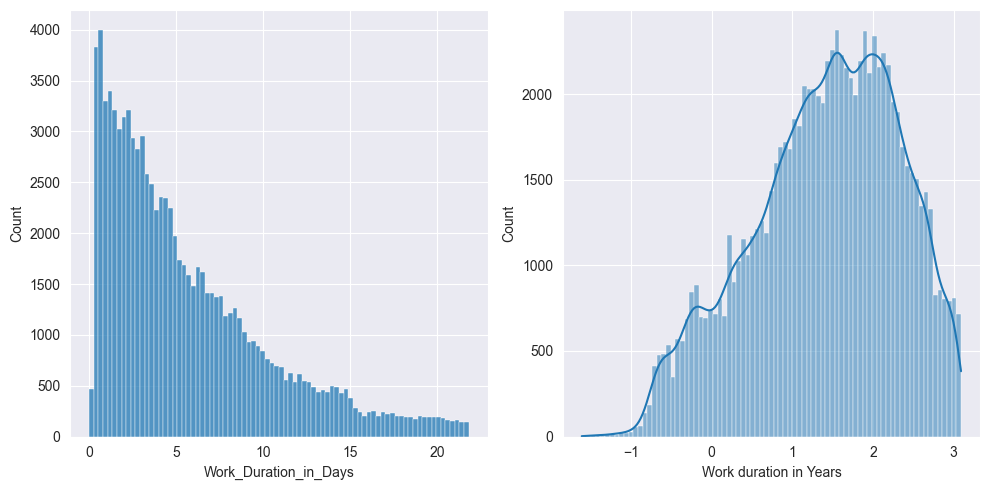

In [67]:

fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot( x=(df.Work_Duration_in_Days/365).round(2) ,ax=ax[0]) ;
sns.histplot( x=  np.log(0.2+ (df.Work_Duration_in_Days/365).round(2) ), ax=ax[1],kde=True) ;
plt.xlabel("Work duration in Years")
plt.tight_layout()

In [68]:
df['Work_Duration_in_Days'].fillna(df['Work_Duration_in_Days'].median(),inplace=True)

In [69]:
df['Work_Duration_in_Years']=( df['Work_Duration_in_Days']/365 ).round(3)

df.drop('Work_Duration_in_Days',axis=1,inplace=True)

In [70]:
df['Work_Duration_in_Years']= np.log(0.2+ df.Work_Duration_in_Years )

<Axes: xlabel='Enlistment_Period_in_Days'>

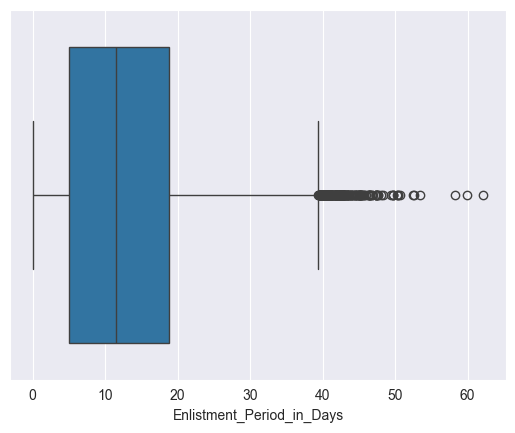

In [71]:
sns.boxplot( x=df.Enlistment_Period_in_Days/365 )

<Axes: xlabel='Enlistment_Period_in_Days', ylabel='Count'>

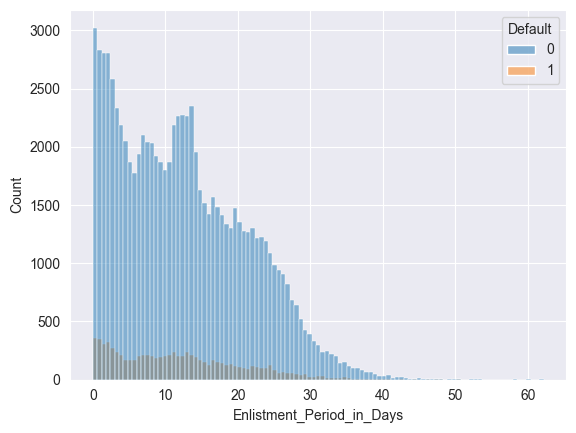

In [72]:
sns.histplot( x=df.Enlistment_Period_in_Days/365 ,hue=df.Default)

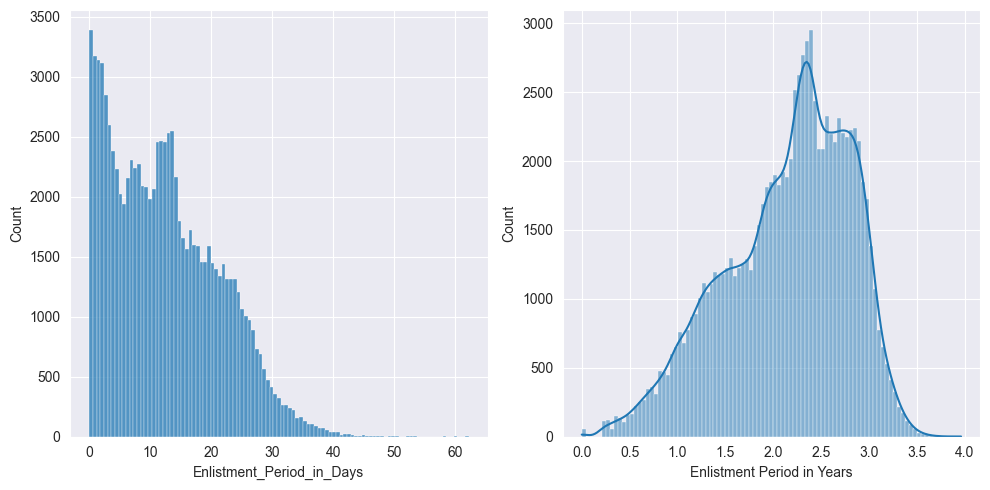

In [73]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot( x=(df.Enlistment_Period_in_Days/365).round(2) ,ax=ax[0]) ;
#sns.histplot( x=  np.log( (df.Enlistment_Period_in_Days/365).round(2) ), ax=ax[1],kde=True) ;
sns.histplot( x=  np.power( (df.Enlistment_Period_in_Days/365).round(2) ,1/3), ax=ax[1],kde=True) ;
plt.xlabel("Enlistment Period in Years")
plt.tight_layout()

In [74]:
df['Enlistment_Period_in_Days'].fillna(df['Enlistment_Period_in_Days'].mean(),inplace=True)

In [75]:
lower_limit,upper_limit=detect_outlier1(df.Enlistment_Period_in_Days/365)

Lower limit: -14.740753424657536 :::Upper Limit: 38.38527397260275


In [76]:
df.drop( df[ (df.Enlistment_Period_in_Days/365)>upper_limit].index ,axis=0,inplace=True)

In [77]:
df['Enlistment_Period_in_Years']=( df['Enlistment_Period_in_Days']/365 ).round(3)

df.drop('Enlistment_Period_in_Days',axis=1,inplace=True)

In [78]:
df['Enlistment_Period_in_Years']=np.power( df['Enlistment_Period_in_Years'] ,1/3)
df['Enlistment_Period_in_Years'].fillna(df['Enlistment_Period_in_Years'].mean(),inplace=True)

<Axes: xlabel='Identity_Age_in_Days', ylabel='Count'>

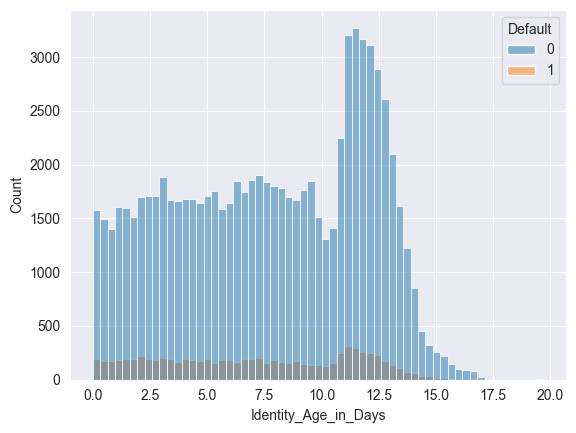

In [79]:
sns.histplot(x=df.Identity_Age_in_Days/365,hue=df.Default)

<Axes: xlabel='Identity_Age_in_Days'>

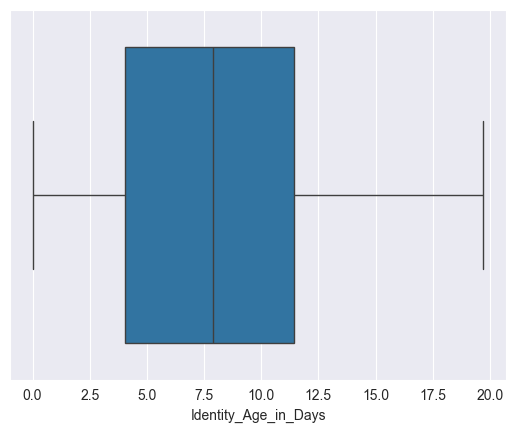

In [80]:
sns.boxplot(x=df.Identity_Age_in_Days/365)

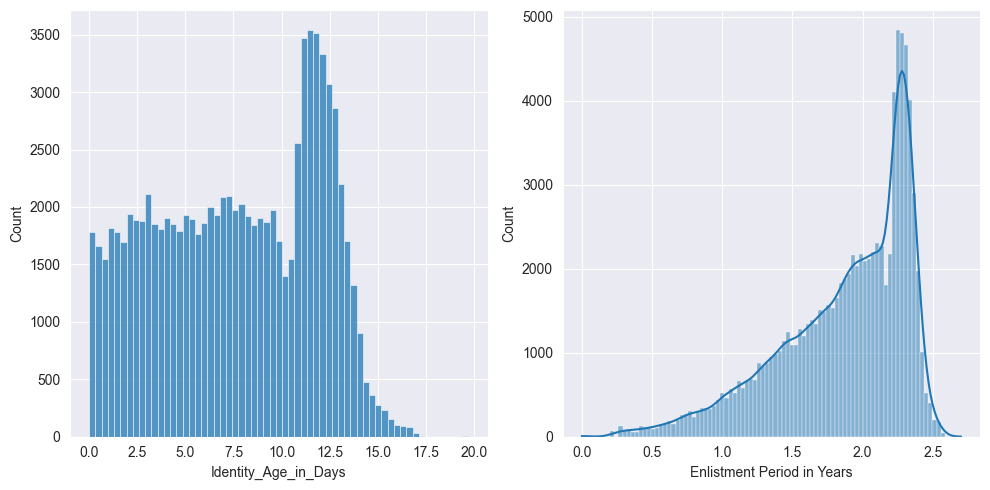

In [81]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot( x=(df.Identity_Age_in_Days/365).round(2) ,ax=ax[0]) ;
sns.histplot( x=  np.power( (df.Identity_Age_in_Days/365).round(2) ,1/3), ax=ax[1],kde=True) ;
plt.xlabel("Enlistment Period in Years")
plt.tight_layout()

In [82]:
df.Identity_Age_in_Days.fillna(df.Identity_Age_in_Days.median(),inplace=True)

In [83]:
lower_limit,upper_limit=detect_outlier1(df.Identity_Age_in_Days/365)

Lower limit: -6.3575342465753435 :::Upper Limit: 21.94931506849315


In [84]:
df['Identity_Age_in_Years']=( df['Identity_Age_in_Days']/365 ).round(3)

df.drop('Identity_Age_in_Days',axis=1,inplace=True)

In [85]:
df['Identity_Age_in_Years']=np.power( df['Identity_Age_in_Years'] ,1/3)
#df.Identity_Age_in_Years.fillna(df.Identity_Age_in_Years.mean(),inplace=True)

In [86]:
df['Identity_Age_in_Years'].isna().sum()

0

**Most of periodic payments are in range of Rs 100 to Rs 5000**

<Axes: xlabel='Borrowing_Periodic_Payment', ylabel='Count'>

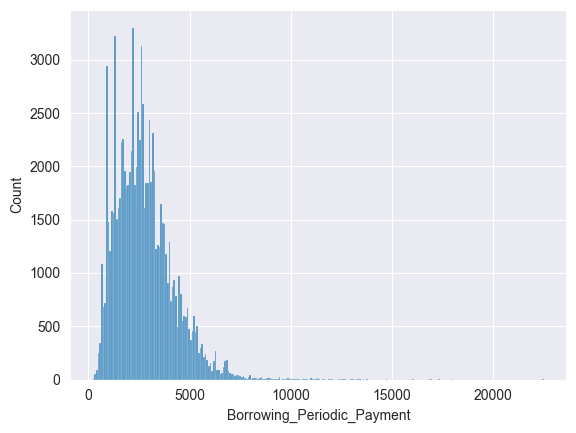

In [87]:
sns.histplot(x=df.Borrowing_Periodic_Payment)

<Axes: xlabel='Borrowing_Periodic_Payment'>

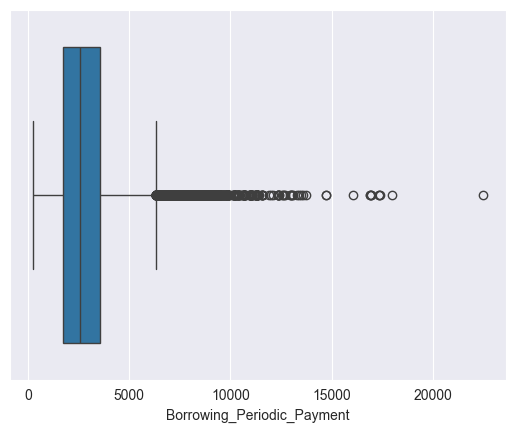

In [88]:
sns.boxplot(x=df.Borrowing_Periodic_Payment)

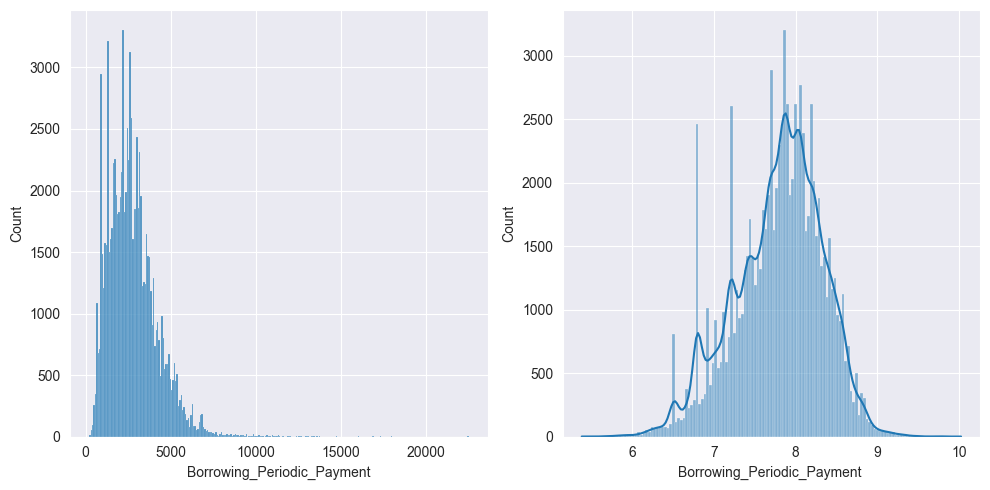

In [89]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot( x=df.Borrowing_Periodic_Payment ,ax=ax[0]) ;
sns.histplot( x=  np.log( df.Borrowing_Periodic_Payment ), ax=ax[1],kde=True) ;
plt.xlabel("Borrowing_Periodic_Payment ")
plt.tight_layout()

In [90]:
z= ( df.Borrowing_Periodic_Payment - df.Borrowing_Periodic_Payment.mean() )/df.Borrowing_Periodic_Payment.std()

In [91]:
df.drop( df[ (z<-3) | (z>3) ].index ,axis=0 ,inplace=True )

In [92]:
df['Borrowing_Periodic_Payment']=np.log(df['Borrowing_Periodic_Payment'])

In [93]:
df['Borrowing_Periodic_Payment'].fillna(df['Borrowing_Periodic_Payment'].mean(),inplace=True)

**Most people have Service and have their own home**

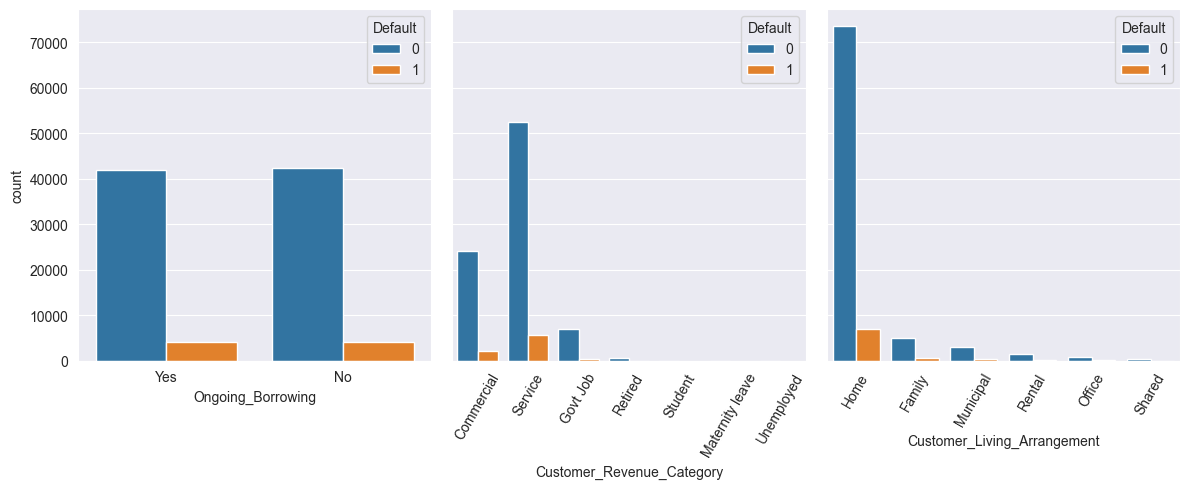

In [94]:
fig,ax=plt.subplots(1,3,figsize=(12,5),sharey=True)
sns.countplot(data=df,x='Ongoing_Borrowing',hue='Default',ax=ax[0])
sns.countplot(data=df,x='Customer_Revenue_Category',hue='Default',ax=ax[1])
ax[1].tick_params(axis='x', rotation=60)
sns.countplot(data=df,x='Customer_Living_Arrangement',hue='Default',ax=ax[2])
ax[2].tick_params(axis='x', rotation=60)
plt.tight_layout()

In [95]:
df.Ongoing_Borrowing.isna().sum(),df.Customer_Revenue_Category.isna().sum(),df.Customer_Living_Arrangement.isna().sum()

(2818, 2867, 2851)

In [96]:
cat_cols_na_index.extend(df[df.Ongoing_Borrowing.isna()].index.values.tolist())
cat_cols_na_index.extend(df[df.Customer_Revenue_Category.isna()].index.values.tolist())
cat_cols_na_index.extend(df[df.Customer_Living_Arrangement.isna()].index.values.tolist())

In [97]:
# df.Ongoing_Borrowing.fillna('unknown',inplace=True)
# df.Customer_Revenue_Category.fillna('unknown',inplace=True)
# df.Customer_Living_Arrangement.fillna('unknown',inplace=True)

In [98]:
df['Ongoing_Borrowing'].fillna(df['Ongoing_Borrowing'].mode()[0],inplace=True)
df['Customer_Revenue_Category'].fillna(df['Customer_Revenue_Category'].mode()[0],inplace=True)
df['Customer_Living_Arrangement'].fillna(df['Customer_Living_Arrangement'].mode()[0],inplace=True)

**Dropping Private_Dwelling_Duration col as it has nearly 60000 na values**

In [99]:
df.Private_Dwelling_Duration.isna().sum()

59271

In [100]:
df.drop('Private_Dwelling_Duration',axis=1,inplace=True)

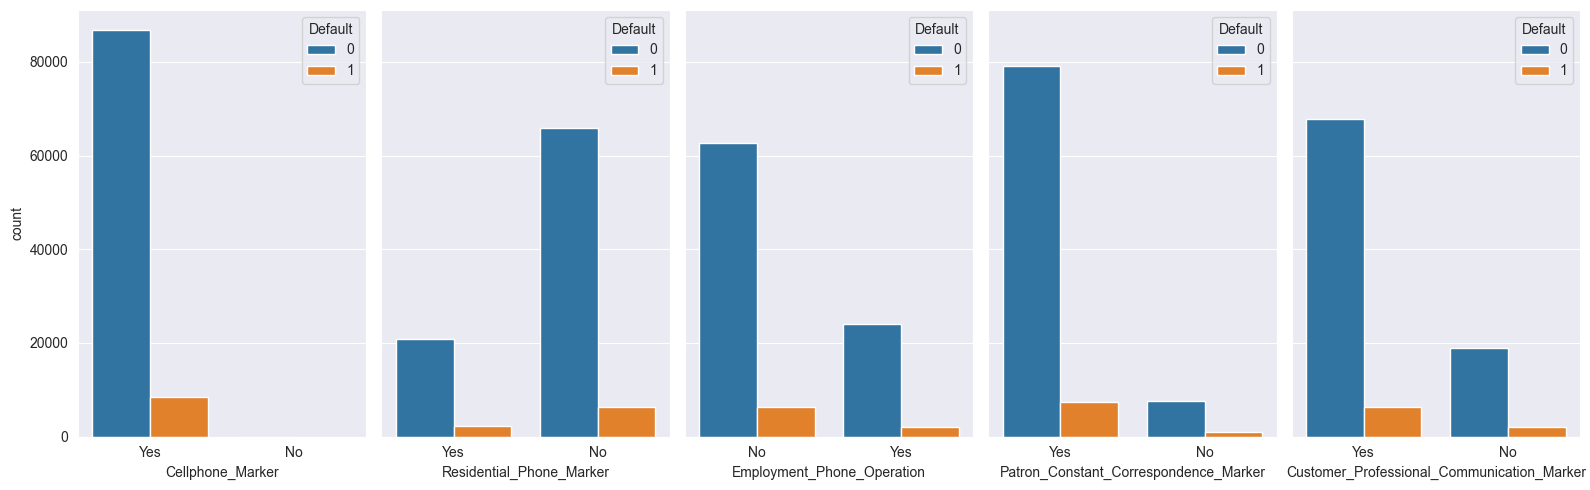

In [101]:
fig,ax=plt.subplots(1,5,figsize=(16,5),sharey=True)
sns.countplot(data=df,x='Cellphone_Marker',hue='Default',ax=ax[0])
sns.countplot(data=df,x='Residential_Phone_Marker',hue='Default',ax=ax[1])
sns.countplot(data=df,x='Employment_Phone_Operation',hue='Default',ax=ax[2])
sns.countplot(data=df,x='Patron_Constant_Correspondence_Marker',hue='Default',ax=ax[3])
sns.countplot(data=df,x='Customer_Professional_Communication_Marker',hue='Default',ax=ax[4])
plt.tight_layout()

In [102]:
df.Cellphone_Marker.isna().sum(),df.Residential_Phone_Marker.isna().sum(),df.Employment_Phone_Operation.isna().sum(),df.Patron_Constant_Correspondence_Marker.isna().sum(),df.Customer_Professional_Communication_Marker.isna().sum(),

(0, 0, 0, 0, 0)

**Most of people are laborers**

<Axes: xlabel='Customer_Urban_Area_Ranking', ylabel='count'>

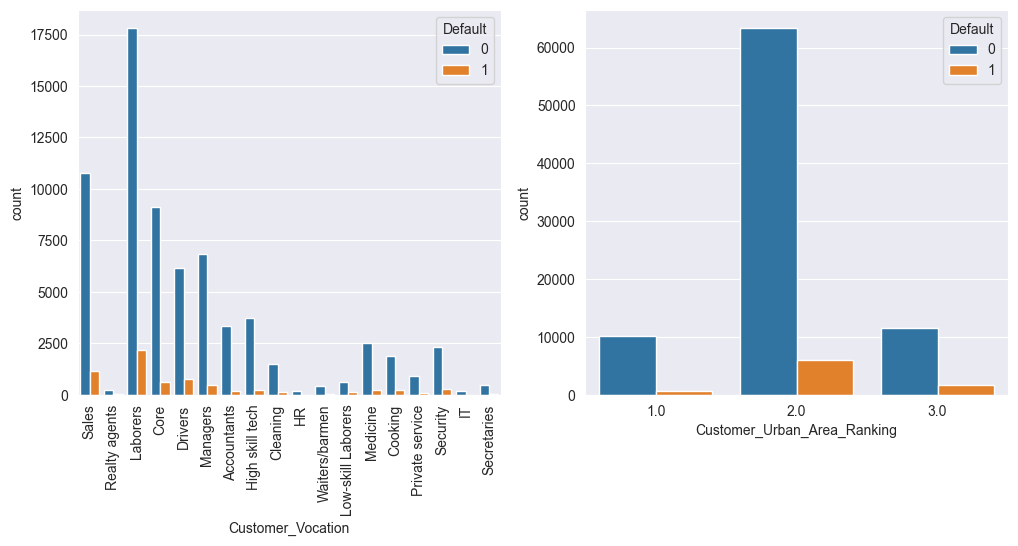

In [103]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(data=df,x='Customer_Vocation',hue='Default',ax=ax[0])
ax[0].tick_params(axis='x', rotation=90)
sns.countplot(data=df,x='Customer_Urban_Area_Ranking',hue='Default',ax=ax[1])

In [104]:
df.Customer_Vocation.isna().sum(),df.Customer_Urban_Area_Ranking.isna().sum()

(19201, 1902)

In [105]:
cat_cols_na_index.extend(df[df.Customer_Vocation.isna()].index.values.tolist())
cat_cols_na_index.extend(df[df.Customer_Urban_Area_Ranking.isna()].index.values.tolist())

In [106]:
# df.Customer_Vocation.fillna('unknown',inplace=True)
# df.Customer_Urban_Area_Ranking.fillna('unknown',inplace=True)

In [107]:
df['Customer_Vocation'].fillna(df['Customer_Vocation'].mode()[0],inplace=True)
df['Customer_Urban_Area_Ranking'].fillna(df['Customer_Urban_Area_Ranking'].mode()[0],inplace=True)

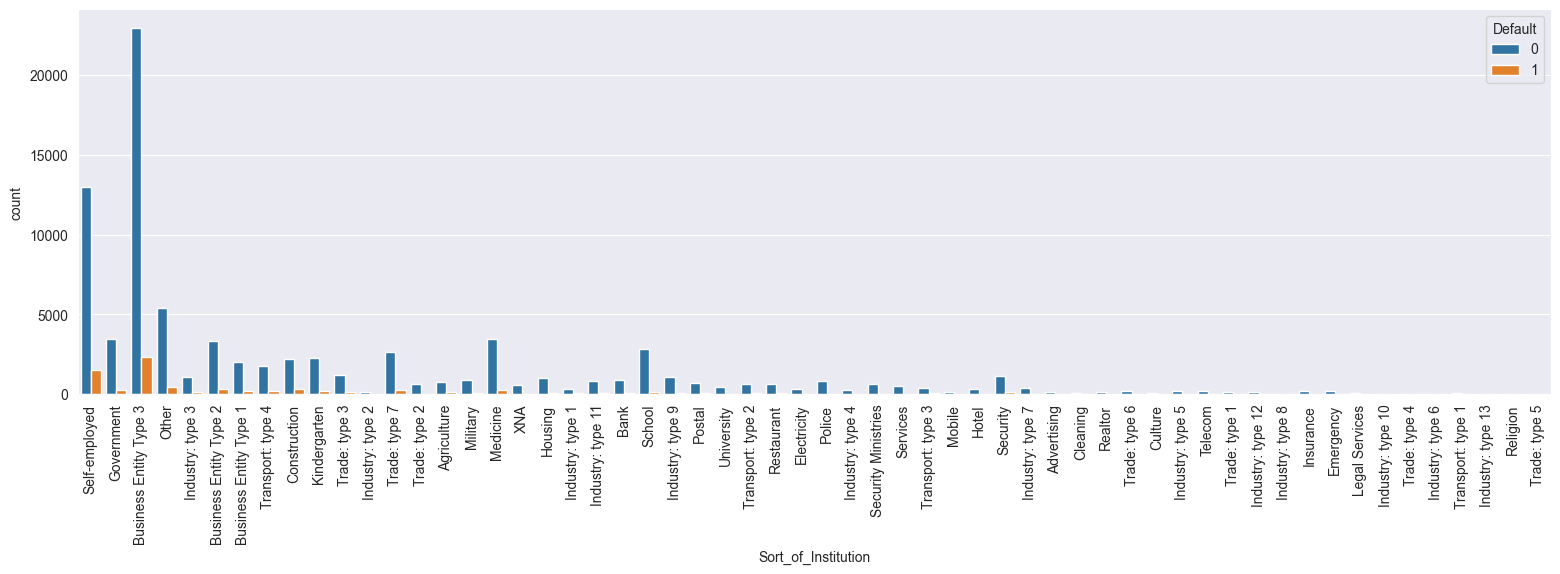

In [108]:
plt.figure(figsize=(19,5))
sns.countplot(x=df.Sort_of_Institution,hue=df.Default)
plt.tick_params(axis='x', rotation=90)

In [109]:
df.Sort_of_Institution.isna().sum()

2806

In [110]:
#df.Sort_of_Institution.fillna('unknown',inplace=True)

In [111]:
df['Sort_of_Institution'].fillna(df['Sort_of_Institution'].mode()[0],inplace=True)

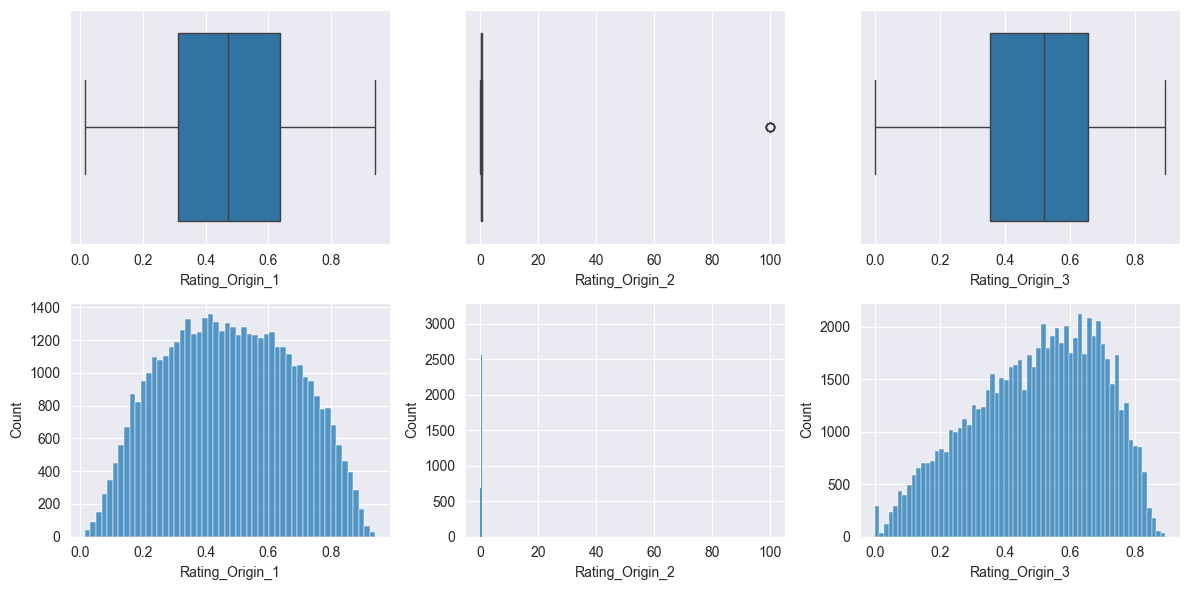

In [112]:
fig,ax=plt.subplots(2,3,figsize=(12,6))
sns.boxplot(data=df,x='Rating_Origin_1',ax=ax[0,0])
sns.boxplot(data=df,x='Rating_Origin_2',ax=ax[0,1])
sns.boxplot(data=df,x='Rating_Origin_3',ax=ax[0,2])

sns.histplot(data=df,x='Rating_Origin_1',ax=ax[1,0])
sns.histplot(data=df,x='Rating_Origin_2',ax=ax[1,1])
sns.histplot(data=df,x='Rating_Origin_3',ax=ax[1,2])

plt.tight_layout()

In [113]:
df[df.Rating_Origin_2>1].Rating_Origin_2

44468     100.0
73097     100.0
105522    100.0
114099    100.0
119243    100.0
Name: Rating_Origin_2, dtype: float64

In [114]:
df.drop( df[df.Rating_Origin_2>1].index,axis=0,inplace=True )

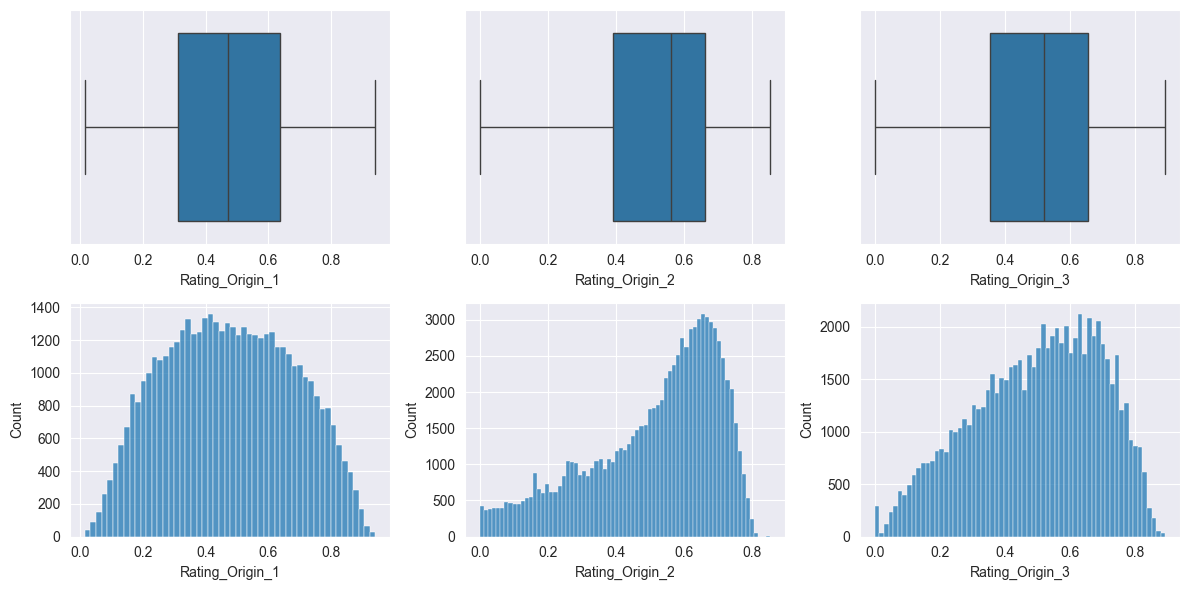

In [115]:
fig,ax=plt.subplots(2,3,figsize=(12,6))
sns.boxplot(data=df,x='Rating_Origin_1',ax=ax[0,0])
sns.boxplot(data=df,x='Rating_Origin_2',ax=ax[0,1])
sns.boxplot(data=df,x='Rating_Origin_3',ax=ax[0,2])

sns.histplot(data=df,x='Rating_Origin_1',ax=ax[1,0])
sns.histplot(data=df,x='Rating_Origin_2',ax=ax[1,1])
sns.histplot(data=df,x='Rating_Origin_3',ax=ax[1,2])

plt.tight_layout()

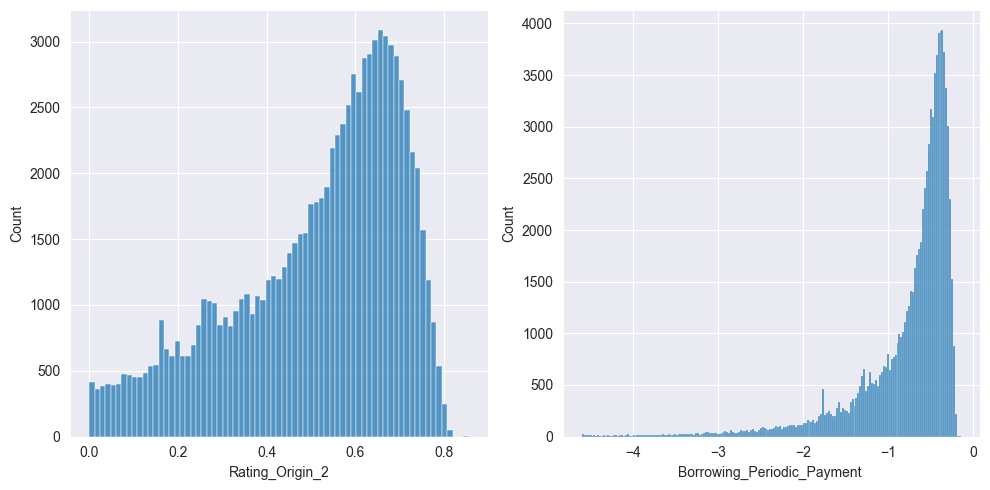

In [116]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot( x=df.Rating_Origin_2 ,ax=ax[0]) ;
sns.histplot( x=  np.log( 0.01+df.Rating_Origin_2  ), ax=ax[1]) ;
plt.xlabel("Borrowing_Periodic_Payment ")
plt.tight_layout()

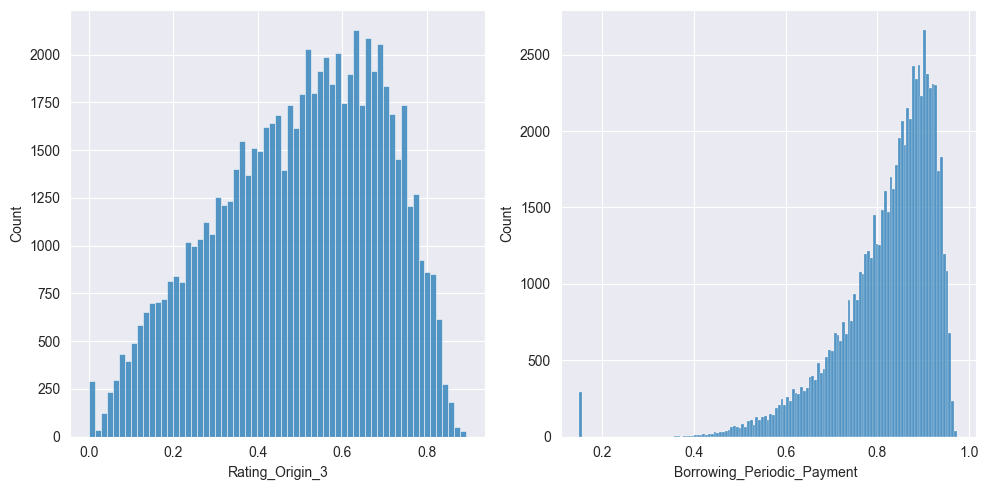

In [117]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot( x=df.Rating_Origin_3 ,ax=ax[0]) ;
sns.histplot( x=  np.power( df.Rating_Origin_3  ,1/4), ax=ax[1]) ;
plt.xlabel("Borrowing_Periodic_Payment ")
plt.tight_layout()

In [118]:
df.Rating_Origin_1.isna().sum(),df.Rating_Origin_2.isna().sum(),df.Rating_Origin_3.isna().sum()

(49212, 4485, 21180)

In [119]:
df['Rating_Origin_2']=np.log(0.01+df['Rating_Origin_2'])
df['Rating_Origin_3']=np.power( df.Rating_Origin_3  ,1/4)

In [120]:
df['Rating_Origin_1'].fillna(df['Rating_Origin_1'].mean(),inplace=True)
df['Rating_Origin_2'].fillna(df['Rating_Origin_2'].mean(),inplace=True)
df['Rating_Origin_3'].fillna(df['Rating_Origin_3'].mean(),inplace=True)

**Dropping Community_Non-Payment_Incidence as it has 48634 null values**

<Axes: xlabel='Community_Non-Payment_Incidence'>

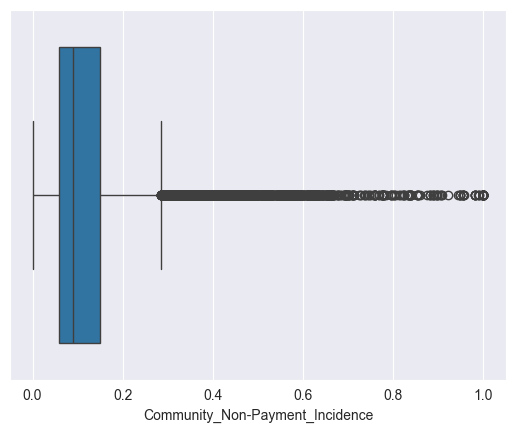

In [121]:
sns.boxplot(x=df['Community_Non-Payment_Incidence'])

<Axes: xlabel='Community_Non-Payment_Incidence', ylabel='Count'>

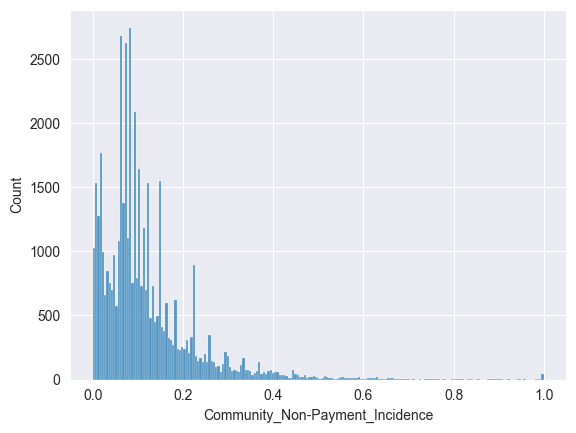

In [122]:
sns.histplot( x=df['Community_Non-Payment_Incidence'] )

In [123]:
df['Community_Non-Payment_Incidence'].isna().sum()

48634

In [124]:
df.drop('Community_Non-Payment_Incidence',axis=1,inplace=True)

<Axes: xlabel='Solvency_Information_Agency', ylabel='count'>

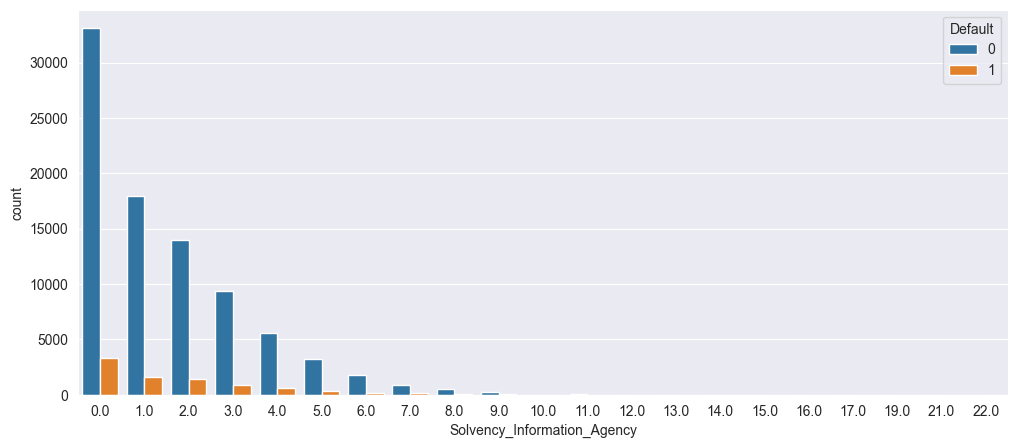

In [260]:
plt.figure(figsize=(12,5))
sns.countplot(x=df.Solvency_Information_Agency,hue=df.Default)

In [127]:
df.Solvency_Information_Agency.isna().sum()

14584

In [129]:
df.Solvency_Information_Agency.fillna(df.Solvency_Information_Agency.mode()[0],inplace=True)

In [261]:
unwanted_cols=['Request_Submission_Day','Request_Submission_Hour','Telecommunication_Switch','Enlistment_Period_in_Years'            
                   ,'Customer_Professional_Communication_Marker','Employment_Phone_Operation','Cellphone_Marker','Patron_Constant_Correspondence_Marker']

num_cols=[col for col in df.columns if df[col].dtype==float and col not in unwanted_cols]
num_cols

['Patron_Salary',
 'Offspring_Number',
 'Loan_Capital',
 'Borrowing_Periodic_Payment',
 'Population_Fraction_by_Region',
 'Patron_Kin_Count',
 'Customer_Urban_Area_Ranking',
 'Rating_Origin_1',
 'Rating_Origin_2',
 'Rating_Origin_3',
 'Solvency_Information_Agency',
 'Elderliness_in_Years',
 'Work_Duration_in_Years',
 'Identity_Age_in_Years']

In [262]:
cat_cols=[col for col in df.columns if df[col].dtype==object and col not in unwanted_cols]
cat_cols

['Automobile_Possession',
 'Two-Wheeler_Ownership',
 'Ongoing_Borrowing',
 'Residence_Proprietorship',
 'Customer_Revenue_Category',
 'Patron_Academic_Qualification',
 'Customer_Conjugal_State',
 'Patron_Sex',
 'Borrowing_Agreement_Category',
 'Customer_Living_Arrangement',
 'Residential_Phone_Marker',
 'Customer_Vocation',
 'Sort_of_Institution']

In [269]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[cat_cols+num_cols],df['Default'],test_size=0.2,random_state=0,stratify=df['Default'])
X_cv,X_test,y_cv,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=5,stratify=y_test)

In [270]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
#enc=OrdinalEncoder()
enc=OneHotEncoder(sparse_output=False)
X_train_cat_enc=pd.DataFrame(enc.fit_transform(X_train[cat_cols].astype(str)))
X_train_cat_enc.columns=enc.get_feature_names_out()

X_test_cat_enc=pd.DataFrame(enc.transform(X_test[cat_cols].astype(str)))
X_test_cat_enc.columns=enc.get_feature_names_out()

X_cv_cat_enc=pd.DataFrame(enc.transform(X_cv[cat_cols].astype(str)))
X_cv_cat_enc.columns=enc.get_feature_names_out()

In [271]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_num_scaled=pd.DataFrame(scale.fit_transform(X_train[num_cols]))
X_train_num_scaled.columns=num_cols

X_test_num_scaled=pd.DataFrame(scale.transform(X_test[num_cols]))
X_test_num_scaled.columns=num_cols

X_cv_num_scaled=pd.DataFrame(scale.transform(X_cv[num_cols]))
X_cv_num_scaled.columns=num_cols

In [272]:
X_train_comb=pd.concat( [X_train_cat_enc.reset_index(drop=True),X_train_num_scaled.reset_index(drop=True)] ,axis=1)
X_test_comb=pd.concat( [X_test_cat_enc.reset_index(drop=True),X_test_num_scaled.reset_index(drop=True)] ,axis=1)
X_cv_comb=pd.concat( [X_cv_cat_enc.reset_index(drop=True),X_cv_num_scaled.reset_index(drop=True)] ,axis=1)

In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,recall_score,precision_score,roc_curve
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

def to_labels(pos_probs, threshold):
 return (pos_probs >= threshold).astype('int')

def predict(X_tr,X_te,y_tr,y_te):
    
    #model=LogisticRegression(max_iter=100)
    #model=DecisionTreeClassifier()
    model=RandomForestClassifier(n_estimators=300,min_samples_split=4)

    model.fit(X_tr,y_tr)

    y_pred=model.predict(X_te)
    f1_sc=f1_score(y_te,y_pred)

    # predict probabilities
    yhat = model.predict_proba(X_te)
    # keep probabilities for the positive outcome only
    probs = yhat[:, 1]

    # define thresholds
    thresholds = np.arange(0, 1, 0.001)

    y_preds=[to_labels(probs, t) for t in thresholds]

    print("Best F-1 Score") 
    # evaluate each threshold
    scores = [f1_score(y_te, y_p) for y_p in y_preds]
    # get best threshold
    ix = np.argmax(scores)
    print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
    print('confusion_matrix \n',confusion_matrix(y_te,to_labels(probs, thresholds[ix])))
    print("Pricision:",precision_score(y_te,to_labels(probs, thresholds[ix])))
    print("Recall:",recall_score(y_te,to_labels(probs, thresholds[ix])))
    print('_'*50)



    best_score_labels=to_labels(probs, thresholds[ix])

    print("Normal results:")
    print("F1 Score: ",f1_sc)
    print('Training accuracy:',model.score(X_tr,y_tr))
    print('Test accuracy:',model.score(X_te,y_te))
    print('confusion_matrix \n',confusion_matrix(y_te,y_pred))
    print("Pricision:",precision_score(y_te,y_pred))
    print("Recall:",recall_score(y_te,y_pred))
    #print(classification_report(y_te, y_pred))
    
    return model,best_score_labels,thresholds[ix]

In [284]:
model,best_score_labels,threshold=predict(X_train_comb,X_cv_comb,y_train,y_cv)

Best F-1 Score
Threshold=0.187, F-Score=0.41017
confusion_matrix 
 [[8049  625]
 [ 465  379]]
Pricision: 0.37749003984063745
Recall: 0.4490521327014218
__________________________________________________
Normal results:
F1 Score:  0.15317286652078774
Training accuracy: 0.9902945773084854
Test accuracy: 0.918680395040975
confusion_matrix 
 [[8674    0]
 [ 774   70]]
Pricision: 1.0
Recall: 0.08293838862559241


In [289]:
probs=model.predict_proba(X_test_comb)[:,1]
pred=to_labels(probs, threshold)
print("F1 Score",f1_score(y_test, pred))
print(confusion_matrix(y_test, pred))

F1 Score 0.4103695532266961
[[8077  597]
 [ 472  372]]


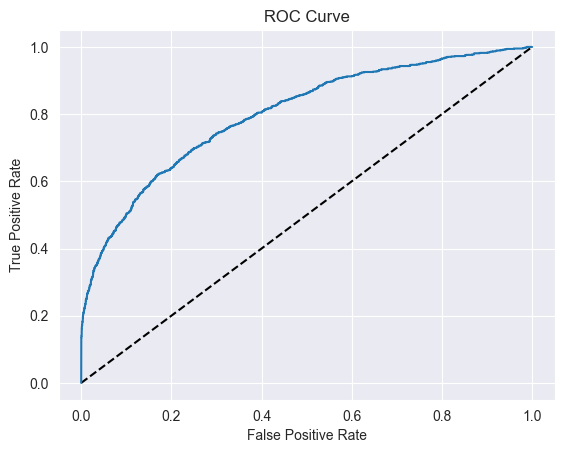

In [291]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test_comb)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()